In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from macrohet import visualise
from tqdm.auto import tqdm
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

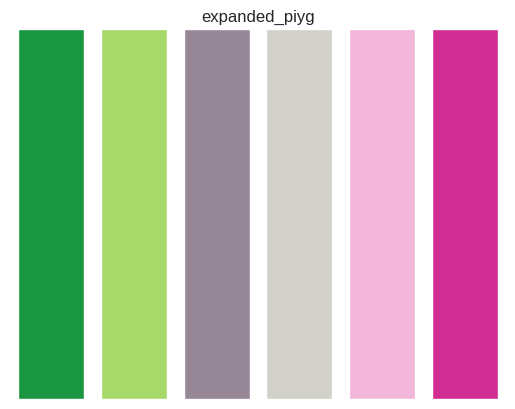

['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91']


In [2]:
# set display params
sns.set(style = 'white')
# Set the default font to Helvetica
mpl.rcParams['font.family'] = 'Liberation Sans'
# Get the color palette of the PiYG color map
expanded_piyg = visualise.color_palette('expanded_piyg').colors
sns.set_palette(expanded_piyg)
# Display the colors in the PiYG color map
visualise.show_colors('expanded_piyg')
print(expanded_piyg)

In [22]:
output_dir = '/mnt/DATA/macrohet/PS0000/results/preliminary_sc_measures/cumulative_sc_plots/mtb_area_dec23/'#'/Users/dayn/data/macrohet_mac/temp_results/'#
os.makedirs(output_dir, exist_ok = True)

In [13]:
# df = pd.read_pickle('/mnt/DATA/macrohet/PS0000/results/preliminary_sc_measures/sc_dfs/sc_df_GT_70_area.pkl')
df = pd.read_pickle('/mnt/DATA/macrohet/PS0000/results/preliminary_sc_measures/sc_dfs/sc_df_GT_70_area_false_outliers_removed.pkl')
df

,Time (hours),Mtb Area,dMtb,Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,...,dMtb/dt,%dMtb/dt,%dMtb,Mean Mtb Intensity,Thresholded Mean Mtb Intensity,Infection Status,Initial Infection Status,Final Infection Status,"dMtb/dt,T=15","Max. dMtb/dt,T=15"
0,0,46.797680,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,29567.0,...,0.000000,0.000000,292.26361,473.168976,167.325424,True,True,True,NaN,6.314185
1,1,48.719647,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26181.0,...,1.921968,4.106972,292.26361,498.701813,202.661972,True,True,True,NaN,6.314185
2,2,52.206007,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26043.0,...,3.486360,7.155963,292.26361,502.468353,210.382874,True,True,True,NaN,6.314185
3,3,50.552221,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,25605.0,...,-1.653786,-3.167808,292.26361,501.905182,212.070969,True,True,True,NaN,6.314185
4,4,54.463202,136.772588,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26430.0,...,3.910981,7.736516,292.26361,502.564423,204.565842,True,True,True,NaN,6.314185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296992,70,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,32533.0,...,0.000000,0.000000,-100.00000,385.325806,1.178588,True,True,False,0.0,0.064066
296993,71,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,31403.0,...,0.000000,0.000000,-100.00000,384.643707,1.152374,True,True,False,0.0,0.064066
296994,72,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,33239.0,...,0.000000,0.000000,-100.00000,384.512726,1.103884,True,True,False,0.0,0.064066
296995,73,0.000000,-3.888632,WT,CTRL,EC0,996.4.5,"(4, 5)",996,42445.0,...,0.000000,0.000000,-100.00000,383.335663,0.893816,True,True,False,0.0,0.064066


In [14]:
# df['dMtb'] = df['delta Mtb max fold-change normalised max area']
df['Mtb'] = df['Mtb Area'] #df['Intracellular thresholded Mtb content smooth']

In [10]:
unique_ID = '85.4.5'
sc_df = df[df['Unique ID'] == unique_ID]
sc_df

,Time (hours),Mtb Area,dMtb,Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,...,%dMtb/dt,%dMtb,Mean Mtb Intensity,Thresholded Mean Mtb Intensity,Infection Status,Initial Infection Status,Final Infection Status,"dMtb/dt,T=15","Max. dMtb/dt,T=15",Mtb
281595,0,2675.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,46764.0,...,0.000000,201.271028,443.901398,127.701759,True,True,True,NaN,185.666667,2675.0
281596,1,2376.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,62884.0,...,-11.177570,201.271028,402.362885,75.280693,True,True,True,NaN,185.666667,2376.0
281597,2,2276.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,67435.0,...,-4.208754,201.271028,390.603058,62.043819,True,True,True,NaN,185.666667,2276.0
281598,3,2608.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,48134.0,...,14.586995,201.271028,428.111389,112.511589,True,True,True,NaN,185.666667,2608.0
281599,4,2398.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,60039.0,...,-8.052147,201.271028,403.103180,79.544876,True,True,True,NaN,185.666667,2398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281665,70,9059.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,14227.0,...,1.740791,201.271028,2083.896240,1993.407959,True,True,True,68.266667,185.666667,9059.0
281666,71,8928.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,13664.0,...,-1.446076,201.271028,2144.229248,2056.757812,True,True,True,49.000000,185.666667,8928.0
281667,72,8303.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,12339.0,...,-7.000448,201.271028,2249.445312,2164.719971,True,True,True,4.333333,185.666667,8303.0
281668,73,6219.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,9494.0,...,-25.099362,201.271028,2205.718750,2113.622314,True,True,True,-149.933333,185.666667,6219.0


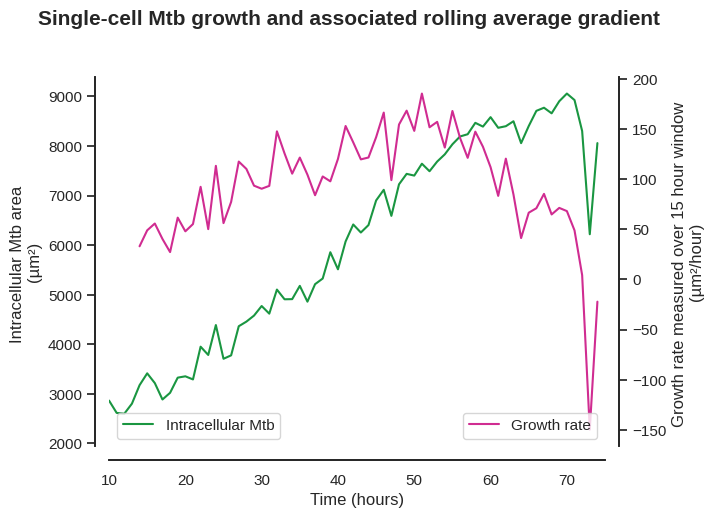

In [11]:

# Calculate the rolling average of 'dMtb/dt' over a specified window (e.g., 15)
window_size = 15
sc_df['Rolling Avg dMtb/dt'] = sc_df['dMtb/dt'].rolling(window=window_size).mean()

# Create the first plot
ax1 = sns.lineplot(x='Time (hours)', y='Mtb Area', data=sc_df, color=expanded_piyg[0], label='Intracellular Mtb')
plt.legend(loc='lower left')
ax1.set_ylabel('Intracellular Mtb area \n(µm\u00b2)')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the rolling average on the second y-axis
sns.lineplot(x='Time (hours)', y='Rolling Avg dMtb/dt', data=sc_df, ax=ax2, color=expanded_piyg[-1], label='Growth rate')  # Adjust color as needed

# Set the y-axis label for the second y-axis
ax2.set_ylabel(f'Growth rate measured over {window_size} hour window \n(µm\u00b2/hour)')
plt.legend(loc='lower right')

# Adjust plot appearance
sns.despine(offset=10, top=True, right=False)
plt.xlim(10, 75)  # Adjust as per your data

# Set the x-axis label and title for the plot
ax1.set_xlabel('Time (hours)')
plt.gcf().suptitle('Single-cell Mtb growth and associated rolling average gradient', 
                   fontsize=15, fontweight='bold', y=1.02)

plt.show()

### Is this max gradient correlated to antibiotic condition?

In [15]:
unique_ids = df['Unique ID'].unique()
len(unique_ids)

3914

In [73]:
unique_ids = df['Unique ID'].unique()
rolling_means = pd.Series(index=df.index)  # Initialize a Series to store the rolling means
max_rolling_means = {}
window_size = 15  # Define your window size

for cell_id in tqdm(unique_ids, total = len(unique_ids)):
    # Filter the DataFrame for the current cell ID
    cell_data = df[df['Unique ID'] == cell_id]

    # Calculate the rolling mean for this cell
    rolling_mean = cell_data['dMtb/dt'].rolling(window=window_size).mean()

    # Store the results in the rolling_means Series
    rolling_means[cell_data.index] = rolling_mean

    # Store the maximum rolling mean for this cell ID
    max_rolling_means[cell_id] = rolling_mean.max()

# Assign the rolling means back to the DataFrame
df[f'dMtb/dt,T={window_size}'] = rolling_means

# Create a new column for the maximum rolling mean per unique ID
df['Max Rolling Mean'] = df['Unique ID'].map(max_rolling_means)

  0%|          | 0/3988 [00:00<?, ?it/s]

In [33]:
output_dir

'/mnt/DATA/macrohet/PS0000/results/preliminary_sc_measures/cumulative_sc_plots/mtb_area_dec23/'

In [23]:
df['Strain/Compound'].unique()

array(['CTRL', 'BDQ', 'INH', 'PZA', 'RIF', 'RD1'], dtype=object)

In [24]:
custom_order = ['RD1', 'CTRL', 'PZA', 'RIF', 'INH', 'BDQ']

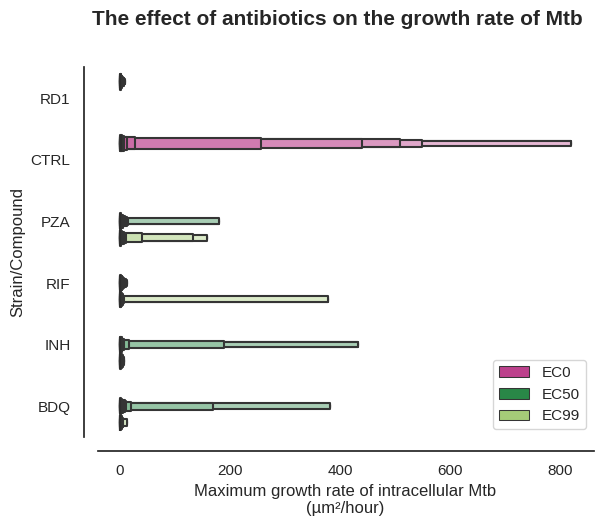

In [32]:
g = sns.boxenplot(x="Max. dMtb/dt,T=15", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale = 'linear', order = custom_order
              )  
sns.despine(offset = 10)
# g.set_xscale('log')
plt.xlabel("Maximum growth rate of intracellular Mtb\n(µm\u00b2/hour)")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
# plt.savefig(os.path.join(output_dir, 'ATB_effect_max_growth_rate.png'), bbox_inches = 'tight', dpi = 314)

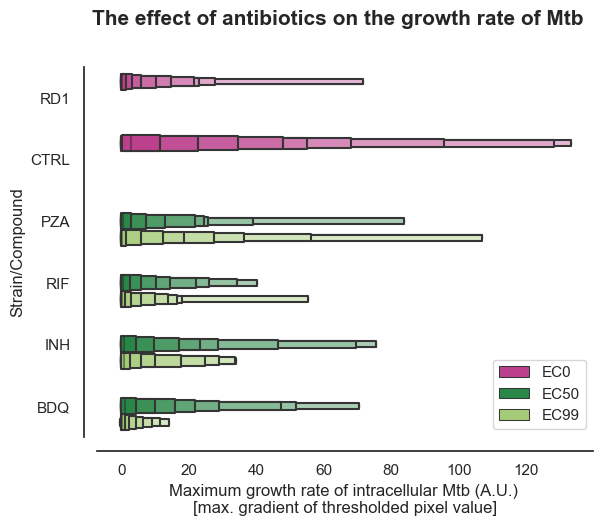

In [163]:
g = sns.boxenplot(x="Max. dMtb gradient", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale = 'linear'
              )  
sns.despine(offset = 10)
plt.xlabel("Maximum growth rate of intracellular Mtb (A.U.) \n[max. gradient of thresholded pixel value]")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
plt.savefig(os.path.join(output_dir, 'ATB_effect_max_growth_rate.png'), bbox_inches = 'tight', dpi = 314)

In [92]:
help(sns.boxenplot)

Help on function boxenplot in module seaborn.categorical:

boxenplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, k_depth='tukey', linewidth=None, scale='exponential', outlier_prop=0.007, trust_alpha=0.05, showfliers=True, ax=None, box_kws=None, flier_kws=None, line_kws=None)
    Draw an enhanced box plot for larger datasets.
    
    This style of plot was originally named a "letter value" plot because it
    shows a large number of quantiles that are defined as "letter values".  It
    is similar to a box plot in plotting a nonparametric representation of a
    distribution in which all features correspond to actual observations. By
    plotting more quantiles, it provides more information about the shape of
    the distribution, particularly in the tails. For a more extensive
    explanation, you can read the paper that introduced the plot:
    https://vita.had.co.nz/papers/letter-v

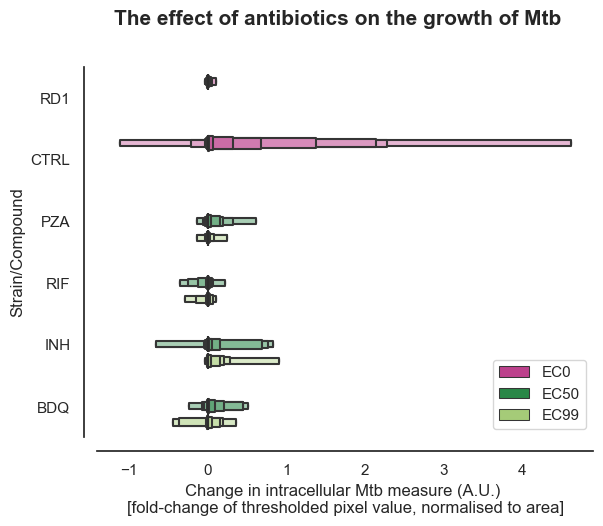

In [164]:
sns.boxenplot(x="dMtb", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale='linear'
              )  
sns.despine(offset = 10)
# plt.xlim(0,5)
plt.xlabel("Change in intracellular Mtb measure (A.U.) \n[fold-change of thresholded pixel value, normalised to area]")
plt.gcf().suptitle('The effect of antibiotics on the growth of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
plt.savefig(os.path.join(output_dir, 'dMtb_boxenplot.png'), bbox_inches = 'tight', dpi = 314)

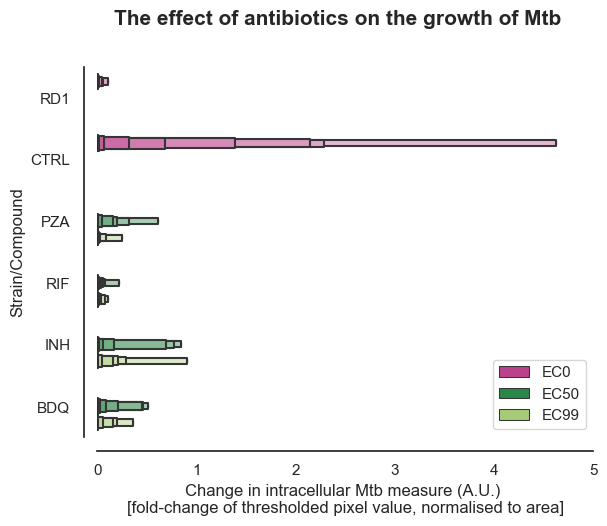

In [165]:
sns.boxenplot(x="dMtb", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale='linear'
              )  
sns.despine(offset = 10)
plt.xlim(0,5)
plt.xlabel("Change in intracellular Mtb measure (A.U.) \n[fold-change of thresholded pixel value, normalised to area]")
plt.gcf().suptitle('The effect of antibiotics on the growth of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
plt.savefig(os.path.join(output_dir, '+dMtb_boxenplot.png'), bbox_inches = 'tight', dpi = 314)

In [ ]:
for acq_ID in df['Acquisition ID'].unique():
    subset_df = [df['Acquisition ID'] == acq_ID]
    mean_max_dMtb_gradient = np.mean 